# Ford GoBikeSystem Data 

# Table of Contents 

- [1. Gathering Data - download manually](#gather)
- [2. Assesing Data](#assess)
    - [2.1 Dataframe of San Francisco](#df_sf)
    - [2.2 Dataframe of Chicago](#df_chi)
- [3. Cleaning Data Part 1](#clean)
- [4. Reassesing Data](#reass)
- [5. Data Exploration](#explore)
    - [5.1 Data Structure](#struc)
    - [5.2 Investigation Details](#invest)
    - [5.3 Visual Exploration](#visexp)
    - [5.4 Univariate Exploration](#uni)
    - [5.5 Bivariate Exploration](#biv)
    - [5.6 Multivariate Exploration](#multi)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math 
import geopy.distance

%matplotlib inline

<a id="gather" ></a>
# 1. Gathering Data - download manually

In [2]:
# reading the tripdata of Ford GoBike (provided by Udacity) into a dataframe
df_SF = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [3]:
# reading the data of Divvy Trips of Chicago
df_CHI = pd.read_csv("./Divvy_Trips_2019_Q1.csv")

<a id="assess" ></a>
# 2. Assessing Data

<a id="df_sf" ></a>
### 2.1 Dataframe of San Francisco

In [4]:
# displaying the first 10 rows
df_SF.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
# getting general information about the dataframe
df_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# getting first statistical values about the dataframe
df_SF.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# displaying 10 random samples of the dataframe
df_SF.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
128503,372,2019-02-10 13:08:19.7950,2019-02-10 13:14:32.7650,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,58.0,Market St at 10th St,37.776619,-122.417385,4601,Subscriber,1968.0,Female,No
141899,349,2019-02-07 17:38:17.1620,2019-02-07 17:44:07.0970,296.0,5th St at Virginia St,37.325998,-121.877120,280.0,San Fernando St at 7th St,37.337122,-121.883215,4026,Subscriber,1994.0,Male,Yes
181533,678,2019-02-01 09:02:40.6310,2019-02-01 09:13:59.4980,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,129.0,Harrison St at 20th St,37.758862,-122.412544,1220,Subscriber,1977.0,Male,No
42691,834,2019-02-22 17:14:12.4870,2019-02-22 17:28:06.6900,355.0,23rd St at Tennessee St,37.755367,-122.388795,27.0,Beale St at Harrison St,37.788059,-122.391865,6086,Customer,1985.0,Female,No
151348,381,2019-02-06 17:22:07.6020,2019-02-06 17:28:28.8320,64.0,5th St at Brannan St,37.776754,-122.399018,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2648,Subscriber,1989.0,Male,No
152818,653,2019-02-06 14:31:26.4350,2019-02-06 14:42:20.0800,121.0,Mission Playground,37.759210,-122.421339,76.0,McCoppin St at Valencia St,37.771662,-122.422423,293,Customer,1976.0,Female,No
118764,555,2019-02-11 18:30:46.3410,2019-02-11 18:40:01.6680,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4813,Subscriber,1985.0,Female,No
146662,574,2019-02-07 08:32:31.6850,2019-02-07 08:42:06.0140,343.0,Bryant St at 2nd St,37.783172,-122.393572,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5487,Subscriber,1957.0,Male,No
14937,764,2019-02-27 10:26:16.2880,2019-02-27 10:39:00.8400,266.0,Parker St at Fulton St,37.862464,-122.264791,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,4582,Subscriber,1976.0,Male,No
169431,239,2019-02-04 10:23:40.6080,2019-02-04 10:27:39.8290,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,4494,Subscriber,1979.0,Male,No


In [8]:
# unique Items in user type
df_SF.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [9]:
# unique items in gender
df_SF.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
# any duplicates in the dataframe?
df_SF.duplicated().sum()

0

In [11]:
# any NaN Values in the df?
df_SF.isnull().sum().sum()

17318

### Quality and Tidiness Issues

- datatypes need to be changed: 
    - Start- and endtime and member_birth_year from string to datetype object
    - Station/bike ids don't not be aggregate. Changing from int/float to string object
    - gender and user_type to categorical objects
- longitude and latitude aren't helpful -> calculate the Tripdistance with the given Coordinates
    - Dropping the columns start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude afterwards
- data from 17318 users about gender and birthyear are missing. Impossible to get/reconstruct this data -> drop this rows
- Create a new column, which identify the that the data is from SF
    

<a id="df_chi" ></a>
### 2.2 Dataframe of Chicago

In [12]:
df_CHI.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


In [13]:
df_CHI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [14]:
df_CHI.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.650690e+05,365069.000000,365069.000000,365069.000000,347046.000000
mean,2.196087e+07,3429.484607,198.088816,198.581123,1981.674297
std,1.271750e+05,1923.321025,153.493553,154.468304,11.245683
min,2.174244e+07,1.000000,2.000000,2.000000,1900.000000
25%,2.184876e+07,1777.000000,76.000000,76.000000,1975.000000
50%,2.196183e+07,3489.000000,170.000000,168.000000,1985.000000
75%,2.207182e+07,5157.000000,287.000000,287.000000,1990.000000
max,2.217853e+07,6471.000000,665.000000,665.000000,2003.000000


In [15]:
df_CHI.sample(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
345189,22155420,2019-03-28 12:39:23,2019-03-28 12:51:47,4103,744.0,374,Western Ave & Walton St,71,Morgan St & Lake St,Subscriber,Male,1993.0
33771,21781175,2019-01-08 08:08:47,2019-01-08 08:14:25,3774,338.0,499,Kosciuszko Park,260,Kedzie Ave & Milwaukee Ave,Subscriber,Male,1990.0
232523,22023153,2019-03-10 16:51:00,2019-03-10 17:33:39,4135,"2,559.0",152,Lincoln Ave & Diversey Pkwy,49,Dearborn St & Monroe St,Subscriber,Male,1992.0
158273,21932096,2019-02-17 12:08:03,2019-02-17 12:18:49,4936,646.0,168,Michigan Ave & 14th St,90,Millennium Park,Subscriber,Female,1968.0
253955,22048380,2019-03-14 06:32:37,2019-03-14 06:37:10,5781,273.0,192,Canal St & Adams St,98,LaSalle St & Washington St,Subscriber,Male,1984.0
25392,21771659,2019-01-06 12:31:25,2019-01-06 12:55:27,5983,"1,442.0",86,Eckhart Park,229,Southport Ave & Roscoe St,Subscriber,Male,1992.0
275150,22073380,2019-03-18 06:33:09,2019-03-18 06:56:35,1745,"1,406.0",153,Southport Ave & Wellington Ave,192,Canal St & Adams St,Subscriber,Male,1984.0
32521,21779831,2019-01-08 03:54:55,2019-01-08 04:10:49,2352,954.0,88,Racine Ave & Randolph St,374,Western Ave & Walton St,Subscriber,Male,1989.0
357480,22169465,2019-03-29 17:53:40,2019-03-29 17:56:36,2202,176.0,323,Sheridan Rd & Lawrence Ave,231,Sheridan Rd & Montrose Ave,Subscriber,Male,1993.0
79078,21833888,2019-01-17 17:44:03,2019-01-17 17:46:34,3093,151.0,113,Bissell St & Armitage Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1995.0


In [16]:
df_CHI.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [17]:
df_CHI.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [18]:
df_CHI.duplicated().sum()

0

In [19]:
df_CHI.isnull().sum().sum()

37734

### Quality and Tidiness Issues

- datatypes need to be changed: 
    - Start- and endtime and member_birth_year from string to datetype object
    - Station/bike ids don't not be aggregate. Changing from int/float to string object
    - gender and user_type to categorical objects
    
- Create a new column, which identify the that the data is from CHI
- trip_id and bike_id schould be dropped, no information provided

- SF as a "Mainframe", so need to change columns names that the columns matches

- unfortunately there is no further data like longitude and latidude in this dataframe -> create empty columns. (Maybe create a googlemaps API and get the data with the addresses)

- some missing data in birthyear and gender -> drop this columns

- the chicago data is from the Q1 2019. The Fordbike data is from 2019-02-01 to 2019-03-01. The chicago timeperiod need to be shorten that it only includes the data from February 2019.

<a id="clean" ></a>
# 3.1 Cleaning Data

In [20]:
# making copies of the original dataframes
df_SF_clean = df_SF.copy()
df_CHI_clean = df_CHI.copy()

### 1. Step - Drop NaN rows in both DFs and rename Chicagos Column names 

In [21]:
df_SF_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [22]:
# Renaming existing columns to column names of DF San Francisco
df_CHI_clean.rename(columns= {"tripduration" : "trip_duration_seconds",
                             "usertype" : "user_type",
                             "from_station_id" : "start_station_id",
                             "to_station_id" : "end_station_id",
                             "from_station_name" : "start_station_name",
                             "to_station_name" : "end_station_name",
                             "bikeid": "bike_id",
                             "gender" : "member_gender",
                             "birthyear" : "member_birth_year"}, inplace = True)

In [23]:
# Renaming Duration sec to a "more" descriptive column name
df_SF_clean.rename(columns= {"duration_sec" : "trip_duration_seconds"}, inplace = True)

In [24]:
#drop rows with NaN
df_SF_clean.dropna(inplace=True)
df_CHI_clean.dropna(inplace=True)

#### Testing

In [25]:
df_SF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_duration_seconds    174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [26]:
df_CHI_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345357 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_id                345357 non-null  int64  
 1   start_time             345357 non-null  object 
 2   end_time               345357 non-null  object 
 3   bike_id                345357 non-null  int64  
 4   trip_duration_seconds  345357 non-null  object 
 5   start_station_id       345357 non-null  int64  
 6   start_station_name     345357 non-null  object 
 7   end_station_id         345357 non-null  int64  
 8   end_station_name       345357 non-null  object 
 9   user_type              345357 non-null  object 
 10  member_gender          345357 non-null  object 
 11  member_birth_year      345357 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 34.3+ MB


### 2. Step - Changing datatypes in both DF

- Time Strings to datetime objects
- ID's to strings
- String objects like user_type, Gender to categorical types
- trip_duration in df CHI to int object
- Birthyear to int object instead of float

In [27]:
# Start time and End time of both DF to datetime objects
df_SF_clean.start_time = pd.to_datetime(df_SF_clean.start_time)
df_SF_clean.end_time = pd.to_datetime(df_SF_clean.end_time)

df_CHI_clean.start_time = pd.to_datetime(df_CHI_clean.start_time)
df_CHI_clean.end_time = pd.to_datetime(df_CHI_clean.end_time)

In [28]:
# member_birth_year columns to integers
df_SF_clean.member_birth_year = df_SF_clean.member_birth_year.astype("int64")
df_CHI_clean.member_birth_year = df_CHI_clean.member_birth_year.astype("int64")

In [29]:
# trip_duration_seconds to int in DF Chicago
df_CHI_clean.trip_duration_seconds = df_CHI_clean.trip_duration_seconds.apply(lambda x: x.split(".")[0].replace(",","")).astype("int64")

In [30]:
# start_station_id, end_station_id to string objects
df_SF_clean.start_station_id = df_SF_clean.start_station_id.astype("int64").astype(str)
df_SF_clean.end_station_id = df_SF_clean.end_station_id.astype("int64").astype(str)

df_CHI_clean.start_station_id = df_CHI_clean.start_station_id.astype(str)
df_CHI_clean.end_station_id = df_CHI_clean.end_station_id.astype(str)

### 3. Step - Dropping not necessary columns

- trip_id in the Chicago df isn't interesting and we don't have such data in the SF Frame
- the data is provided by two different companies, so the bike_id isn't necessary

In [31]:
df_SF_clean.drop(columns = ["bike_id", "bike_share_for_all_trip"], inplace = True)
df_CHI_clean.drop(columns = ["bike_id", "trip_id"], inplace = True)

#### Testing

In [32]:
df_SF_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration_seconds    174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  user_type                174952 non-null  object        
 12  member_birth_yea

In [33]:
df_CHI_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345357 entries, 0 to 365068
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   start_time             345357 non-null  datetime64[ns]
 1   end_time               345357 non-null  datetime64[ns]
 2   trip_duration_seconds  345357 non-null  int64         
 3   start_station_id       345357 non-null  object        
 4   start_station_name     345357 non-null  object        
 5   end_station_id         345357 non-null  object        
 6   end_station_name       345357 non-null  object        
 7   user_type              345357 non-null  object        
 8   member_gender          345357 non-null  object        
 9   member_birth_year      345357 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 29.0+ MB


### 4. Step - Filtering the timeperiod of the Chicago Frame (only February)

In [34]:
# Checking the Time period of the San Francisco DF
df_SF_clean.start_time.max(), df_SF_clean.start_time.min()

(Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:00:20.636000'))

In [35]:
# Filtering the Chicago DF for the same Timeperiod like the the SF Frame
df_CHI_clean = df_CHI_clean.query("20190201 < start_time < 20190301") 

### 5. Step - Creating a City column for both frames

In [36]:
# Creating City columns in both frames
df_SF_clean['city'] = "San Francisco"
df_CHI_clean['city'] = "Chicago"

In [37]:
# zipping the latitude and lonitude values of start and end to one column each - calculating afterwards the tripdistance
df_SF_clean['start_coordinates'] = list(zip(df_SF_clean["start_station_latitude"],df_SF_clean["start_station_longitude"]))
df_SF_clean['end_coordinates'] = list(zip(df_SF_clean["end_station_latitude"],df_SF_clean["end_station_longitude"]))

In [38]:
# dropping the single latitude and longitude columns of start and end
df_SF_clean.drop(columns=["start_station_latitude", "start_station_longitude", 
                          "end_station_latitude", "end_station_longitude"], inplace = True)

### 6. Step Concating both Dataframes to one main frame

In [39]:
# concat cleaned df_SF and df_CHI to one main DF
df_main_clean = pd.concat([df_SF_clean, df_CHI_clean])

#### Testing

In [40]:
df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268465 entries, 0 to 199457
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_duration_seconds  268465 non-null  int64         
 1   start_time             268465 non-null  datetime64[ns]
 2   end_time               268465 non-null  datetime64[ns]
 3   start_station_id       268465 non-null  object        
 4   start_station_name     268465 non-null  object        
 5   end_station_id         268465 non-null  object        
 6   end_station_name       268465 non-null  object        
 7   user_type              268465 non-null  object        
 8   member_birth_year      268465 non-null  int64         
 9   member_gender          268465 non-null  object        
 10  city                   268465 non-null  object        
 11  start_coordinates      174952 non-null  object        
 12  end_coordinates        174952 non-null  obje

### 7. Step Changing Datatypes

- member_gender, user_type and city from a string object to a category object

In [41]:
df_main_clean.member_gender = df_main_clean.member_gender.astype("category")
df_main_clean.user_type = df_main_clean.user_type.astype("category")
df_main_clean.city = df_main_clean.city.astype("category")

#### Testing

In [42]:
df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268465 entries, 0 to 199457
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_duration_seconds  268465 non-null  int64         
 1   start_time             268465 non-null  datetime64[ns]
 2   end_time               268465 non-null  datetime64[ns]
 3   start_station_id       268465 non-null  object        
 4   start_station_name     268465 non-null  object        
 5   end_station_id         268465 non-null  object        
 6   end_station_name       268465 non-null  object        
 7   user_type              268465 non-null  category      
 8   member_birth_year      268465 non-null  int64         
 9   member_gender          268465 non-null  category      
 10  city                   268465 non-null  category      
 11  start_coordinates      174952 non-null  object        
 12  end_coordinates        174952 non-null  obje

In [43]:
df_main_clean.reset_index(drop=True, inplace=True)

### 8. Calculating the Travel Distance with the given coordinates (SF Dataframe)

In [44]:
df_main_clean.tail()

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates
268460,101,2019-02-28 23:56:20,2019-02-28 23:58:01,423,University Ave & 57th St,420,Ellis Ave & 55th St,Subscriber,1999,Male,Chicago,NaN,NaN
268461,789,2019-02-28 23:57:16,2019-03-01 00:10:25,166,Ashland Ave & Wrightwood Ave,127,Lincoln Ave & Fullerton Ave,Subscriber,1998,Female,Chicago,NaN,NaN
268462,398,2019-02-28 23:57:31,2019-03-01 00:04:09,232,Pine Grove Ave & Waveland Ave,312,Clarendon Ave & Gordon Ter,Subscriber,1980,Male,Chicago,NaN,NaN
268463,350,2019-02-28 23:58:54,2019-03-01 00:04:44,184,State St & 35th St,272,Indiana Ave & 31st St,Subscriber,1985,Male,Chicago,NaN,NaN
268464,2472,2019-02-28 23:59:00,2019-03-01 00:40:12,592,Knox Ave & Montrose Ave,256,Broadway & Sheridan Rd,Subscriber,1961,Male,Chicago,NaN,NaN


In [45]:
# Calculate Distance with geopy

def calc_dist_geop(df_row):
    
    # i saved the coodinates as tuples, so if that is true it return the drip distance. Probably not the best "if condition"
    if type(df_row["start_coordinates"]) is tuple and type(df_row['end_coordinates']) is tuple:
        coords_1 = df_row["start_coordinates"]
        coords_2 = df_row['end_coordinates']
        return geopy.distance.distance(coords_1, coords_2).km   
            
    else:
        return np.nan


In [46]:
# Appling the function the dataframe and calculating the distances
df_main_clean["distance"] = df_main_clean.apply(calc_dist_geop, axis=1)

<a id="reass" ></a>
# 4. Reassessing/Testing Data

In [47]:
df_main_clean.head()

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,San Francisco,"(37.7896254, -122.400811)","(37.794231, -122.402923)",0.543983
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,San Francisco,"(37.7693053, -122.4268256)","(37.78637526861584, -122.40490436553954)",2.705390
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,San Francisco,"(37.77483629413345, -122.44654566049576)","(37.77331087889723, -122.44429260492323)",0.260896
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,San Francisco,"(37.8045623549303, -122.27173805236816)","(37.7927143, -122.2487796)",2.412017
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,San Francisco,"(37.7704074, -122.3911984)","(37.79801364395978, -122.40595042705534)",3.328256


In [48]:
df_main_clean.tail()

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates,distance
268460,101,2019-02-28 23:56:20,2019-02-28 23:58:01,423,University Ave & 57th St,420,Ellis Ave & 55th St,Subscriber,1999,Male,Chicago,NaN,NaN,NaN
268461,789,2019-02-28 23:57:16,2019-03-01 00:10:25,166,Ashland Ave & Wrightwood Ave,127,Lincoln Ave & Fullerton Ave,Subscriber,1998,Female,Chicago,NaN,NaN,NaN
268462,398,2019-02-28 23:57:31,2019-03-01 00:04:09,232,Pine Grove Ave & Waveland Ave,312,Clarendon Ave & Gordon Ter,Subscriber,1980,Male,Chicago,NaN,NaN,NaN
268463,350,2019-02-28 23:58:54,2019-03-01 00:04:44,184,State St & 35th St,272,Indiana Ave & 31st St,Subscriber,1985,Male,Chicago,NaN,NaN,NaN
268464,2472,2019-02-28 23:59:00,2019-03-01 00:40:12,592,Knox Ave & Montrose Ave,256,Broadway & Sheridan Rd,Subscriber,1961,Male,Chicago,NaN,NaN,NaN


In [49]:
df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268465 entries, 0 to 268464
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_duration_seconds  268465 non-null  int64         
 1   start_time             268465 non-null  datetime64[ns]
 2   end_time               268465 non-null  datetime64[ns]
 3   start_station_id       268465 non-null  object        
 4   start_station_name     268465 non-null  object        
 5   end_station_id         268465 non-null  object        
 6   end_station_name       268465 non-null  object        
 7   user_type              268465 non-null  category      
 8   member_birth_year      268465 non-null  int64         
 9   member_gender          268465 non-null  category      
 10  city                   268465 non-null  category      
 11  start_coordinates      174952 non-null  object        
 12  end_coordinates        174952 non-null  obje

In [50]:
df_main_clean.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

In [51]:
df_main_clean.member_gender.unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Male', 'Other', 'Female']

In [52]:
df_main_clean.member_gender.value_counts()

Male      207695
Female     57123
Other       3647
Name: member_gender, dtype: int64

In [53]:
df_main_clean.user_type.value_counts()

Subscriber    251167
Customer       17298
Name: user_type, dtype: int64

In [54]:
df_main_clean.city.value_counts()

San Francisco    174952
Chicago           93513
Name: city, dtype: int64

<a id="explore" ></a>
# 5. Data Exploration

<a id="struc" ></a>
## 5.1 Data structure

The dataset consists of two datasets of two different cities; San Francisco and Chicago. There are 268465 individuals rides recorded from the Ford GoBike System (San Francisco) and the Divvy Trips System (Chicago). The data gives insights about the duration of a ride, the gender, user type and the birth year. Furthermore there are information about the trip distance in the San Francisco dataset.

There two different user types:

- Customer and Subscriber

Gender in:

- Male, Female and other

The columns are as followed:

 0.   trip_duration_seconds       
 1.   start_time             
 2.   end_time               
 3.   start_station_id             
 4.   start_station_name      
 5.   end_station_id          
 6.   end_station_name         
 7.   user_type              
 8.   member_birth_year     
 9.   member_gender          
 10.  city                    
 11.  start_coordinates       
 12.  end_coordinates
 13.  distance

The dataset only gives information about ride behavoiur of February 2019.

<a id="invest" ></a>
## 5.2 Investigation Details

I'm most interested how people uses the bike renting platform. When are the most Trips taken; which weekday has high traffic? Is there any differences in the user types or gender? 

<a id="visexp" ></a>
# 5.3 Visual Exploration

<a id="uni" ></a>
## 5.4 Univariate Exploration

#### Gender, Usertype and City Distribution

First take closer look how the distributions of gender, user type and cities are in the dataframe:

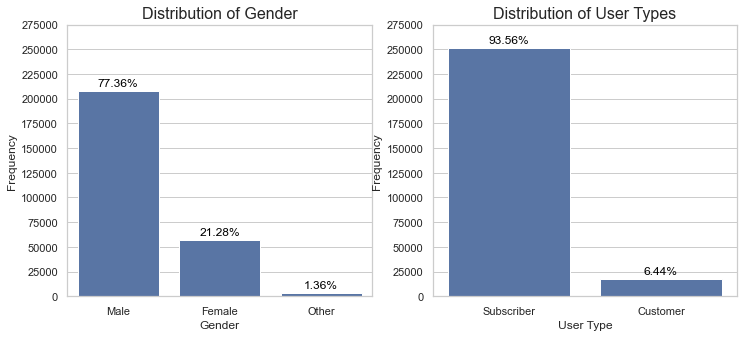

In [55]:
# plotting the Distribution of Gender and User Type
sb.set_theme(style="whitegrid")

base_color = sb.color_palette()[0]

plt.figure(figsize=[12,5])

counts_all = df_main_clean.member_gender.count()
gend_counts = df_main_clean.member_gender.value_counts()
gend_order = gend_counts.index

# First subplot to display the gender distribution
plt.subplot(1,2,1)
sb.countplot(data = df_main_clean, x = "member_gender", color = base_color, order = gend_order)

locs, labels = plt.xticks()

# displaying the relative Distirbution of each value
for loc, label in zip(locs,labels):
    
    count = gend_counts[label.get_text()]
    pct_string = "{:0.2f}%".format(100*count/counts_all)
    
    plt.text(loc, count+5000, pct_string, ha = 'center', color = 'black')

    
# Setting the Tickrate
y_ticks = np.arange(0, 275001, 25000)
plt.ylim(0, 275000)
plt.yticks(y_ticks)

# Setting the y and x label
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender", fontsize = 16);


# Plotting the Distribution of User Types

counts_type_all = df_main_clean.user_type.count()
type_counts = df_main_clean.user_type.value_counts()
type_order = type_counts.index


# Second Subplot to display the distirbution of the user types
plt.subplot(1,2,2)
sb.countplot(data = df_main_clean, x = "user_type", color = base_color, order=type_order)


locs, labels = plt.xticks()

# displaying the relative Distirbution of each value
for loc, label in zip(locs,labels):
    
    count = type_counts[label.get_text()]
    pct_string = "{:0.2f}%".format(100*count/counts_all)
    
    plt.text(loc, count+5000, pct_string, ha = 'center', color = 'black')


y_ticks = np.arange(0, 275001, 25000)


plt.xlabel("User Type")
plt.ylim(0, 275000)
plt.yticks(y_ticks)
plt.ylabel("Frequency")
plt.title("Distribution of User Types", fontsize = 16);



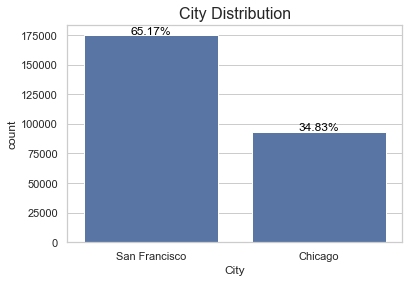

In [56]:
# Displaying the city distribution - only two cities should be displayed

counts_city_all = df_main_clean.city.count()
city_counts = df_main_clean.city.value_counts()
city_order = city_counts.index

sb.countplot(data = df_main_clean, x = "city", color = base_color, order = city_order);

locs, labels = plt.xticks()

# displaying the relative Distirbution of each value
for loc, label in zip(locs,labels):
    
    count = city_counts[label.get_text()]
    pct_string = "{:0.2f}%".format(100*count / counts_city_all)
    
    plt.text(loc, count+500, pct_string, ha = 'center', color = 'black')

plt.xlabel("City")
plt.title("City Distribution", fontsize = 16);


The Gender distribution shows us that lots of men using the bike renting platform. About 77,3 % of the users are male. 21,3 % are female and 1,4% are others. Usually users are subscriber (93%) and the rest are customers. 65 % of the records are from San Francisco



Now I'm interested in the distribution of trips per weekday(Monday to Sunday) and daytime. The daytime is divided in "Morning" 6 am - 12, "Afternoon" 12 - 5 pm, "Evening" 5 pm - 8 pm and "Night" 8 pm - 6 am. 

#### Weekday and day time distribution

In [57]:
#prep to extract the weekdays of each bike sharing entry and saves it as a categorical object
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_cat = pd.api.types.CategoricalDtype(ordered=True, categories = days_order)

# copying the main df and creating new weekday column
df_weekdays = df_main_clean.copy()
df_weekdays["weekday"] = df_weekdays.start_time.dt.day_name()
df_weekdays["weekday"] = df_weekdays["weekday"].astype(day_cat)

In [58]:
df_weekdays.weekday.value_counts()

Thursday     52517
Tuesday      46665
Wednesday    45418
Monday       41086
Friday       40922
Saturday     21362
Sunday       20495
Name: weekday, dtype: int64

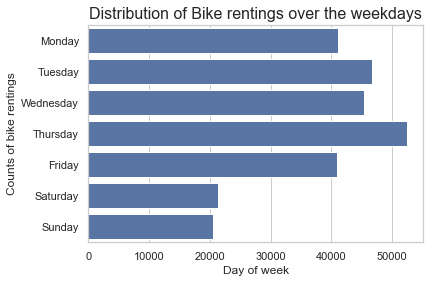

In [59]:
# Plotting the Distribution of Bike rentings over the weekdays
sb.countplot(data = df_weekdays, y = "weekday", color=base_color, order=days_order)


plt.xlabel("Day of week")
plt.ylabel("Counts of bike rentings")
plt.title("Distribution of Bike rentings over the weekdays", fontsize = 16);

In [60]:
# Creating another column with each hour
df_weekdays['hour'] = df_weekdays.start_time.dt.hour

# creating bins with the daytimes - 0-6: night, 6-12: morning, 12-17: afternoon, 17-20: evening, 20-24: night
day_times = ["night", "morning", "afternoon", "evening", "night"]
daytime_bins = [0, 6, 12, 17, 20, 24]

# cutting the hours column with the assigned day time labels and bins. in this case ordered must be False cause "night" 
# is twice in the label bin
df_weekdays["day_time"] = pd.cut(df_weekdays["hour"], daytime_bins, labels = day_times, ordered=False)

# ordering the day time in the right places and changing the type to an ordered category
day_time_order = ["morning", "afternoon", "evening", "night"]
day_time_cat = pd.api.types.CategoricalDtype(ordered=True, categories = day_time_order)
df_weekdays.day_time = df_weekdays.day_time.astype(day_time_cat)

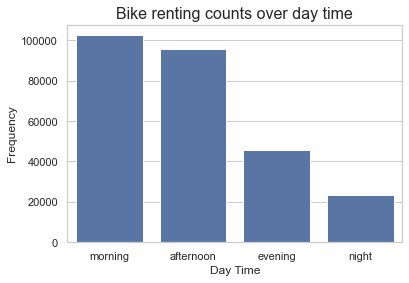

In [61]:
# Displaying the Trip frequency over the day time
sb.countplot(data = df_weekdays, x = "day_time", color = base_color, order = day_time_order)
plt.xlabel("Day Time")
plt.ylabel("Frequency")
plt.title("Bike renting counts over day time", fontsize=16);

The most traffic is on workdays with the highest peak on thurdays. On workdays are more than 40k trips (on thurdays more than 50k trip). Weekends are less trafic. about 20k trips per day. The most rides are in rush hour time(morning and afternoon)

For next exploration I want to look for the duration and distance of bike trips:

#### Duration and Distance Distirbution

In [62]:
# displaying statistical values of trip duration and distance
df_weekdays[["trip_duration_seconds", "distance"]].describe()

,trip_duration_seconds,distance
count,2.684650e+05,174952.000000
mean,7.430680e+02,1.689939
std,1.043773e+04,1.096526
min,6.100000e+01,0.000000
25%,3.190000e+02,0.909710
50%,5.020000e+02,1.428159
75%,7.840000e+02,2.224675
max,3.926850e+06,69.465977


In [63]:
df_weekdays["trip_duration"] = pd.to_timedelta(df_weekdays['trip_duration_seconds'], unit = "seconds")

In [64]:
df_weekdays[["trip_duration", "distance"]].describe()

,trip_duration,distance
count,268465,174952.000000
mean,0 days 00:12:23.067982791,1.689939
std,0 days 02:53:57.731668578,1.096526
min,0 days 00:01:01,0.000000
25%,0 days 00:05:19,0.909710
50%,0 days 00:08:22,1.428159
75%,0 days 00:13:04,2.224675
max,45 days 10:47:30,69.465977


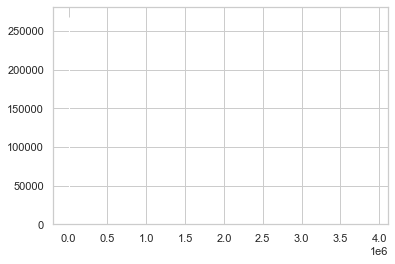

In [65]:
# fast plot of the trip duration
trip_min = df_weekdays.trip_duration_seconds.min()
trip_max = df_weekdays.trip_duration_seconds.max()
bin_edges = np.arange(trip_min, trip_max + 500, 10000)

plt.hist(data = df_weekdays, x = "trip_duration_seconds", bins =bin_edges);

#### Issue
- There is an bike sharing entry with 45 days and 10 hours. The median ist about 8 minutes and the third quartile is at 13: minutes - maybe someone forgot to "log out"


- Let's take a closer look to all entries within 60 minutes - usually a trip takes 12:23 minutes

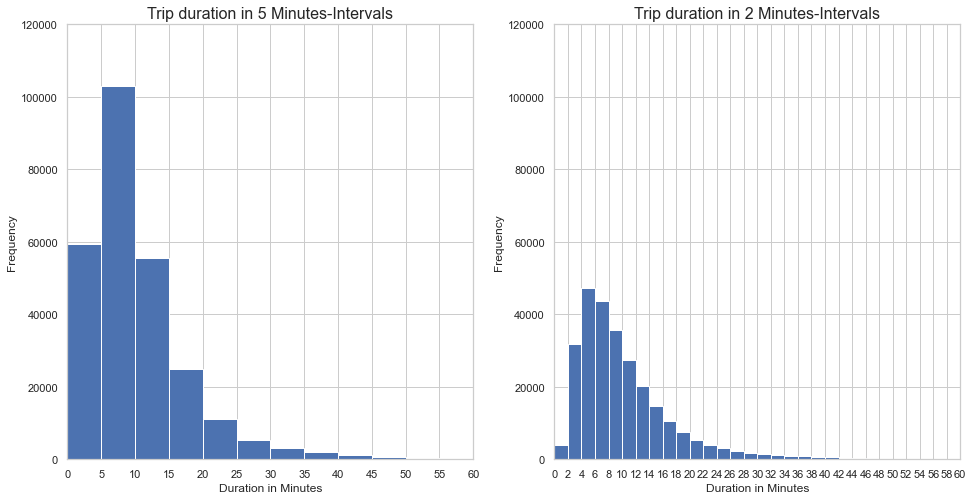

In [66]:
# Displaying the distribution of trip duration in minutes
plt.figure(figsize=[16,8])

# assign the limits of the the bin_edges -> 3600 seconds = 1 Hour = 60 mins
trip_min = 0
trip_max = 3600

# first subplot with 5 mins = 300 seconds intervals
plt.subplot(1,2,1)
bin_edges = np.arange(trip_min, trip_max+200, 300)

# changing the x axis label ticks to minutes
minute_labels = np.arange(0,60+1,5)

plt.hist(data = df_weekdays, x = "trip_duration_seconds", bins = bin_edges)
plt.xlabel("Duration in Minutes")
plt.ylabel("Frequency")
plt.xlim(0,3600)
plt.ylim(0,120000)
plt.xticks(bin_edges, labels = minute_labels)
plt.title("Trip duration in 5 Minutes-Intervals", fontsize = 16);

# second plot with 2 mins = 120 seconds intervals
plt.subplot(1,2,2)
bin_edges = np.arange(trip_min, trip_max+100, 120)

# changing the x axis label ticks to minutes
minute_labels = np.arange(0,60+1,2)


plt.hist(data = df_weekdays, x = "trip_duration_seconds", bins = bin_edges)
plt.xlabel("Duration in Minutes")
plt.ylabel("Frequency")
plt.xlim(0,3600)
plt.xticks(bin_edges, labels = minute_labels)
plt.title("Trip duration in 2 Minutes-Intervals", fontsize = 16)
plt.ylim(0,120000);

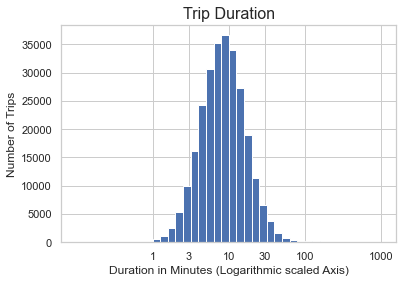

In [67]:
# Plotting the the trip duration with an log scaled axis
bin_edges = 10 ** np.arange(-1, 3+0.1, 0.1) 

plt.hist((df_weekdays.trip_duration_seconds / 60), bins = bin_edges)
plt.xscale('log')
tick_locs = [1,3,10, 30, 100, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration in Minutes (Logarithmic scaled Axis)')
plt.title('Trip Duration', fontsize = 16)
plt.ylabel('Number of Trips');

In [68]:
df_weekdays[df_weekdays.distance > 20]

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates,distance,weekday,hour,day_time,trip_duration
106913,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21,Montgomery St BART Station (Market St at 2nd St),300,Palm St at Willow St,Subscriber,1985,Female,San Francisco,"(37.7896254, -122.400811)","(37.3172979, -121.884995)",69.465977,Tuesday,14,afternoon,0 days 01:55:45


In [69]:
df_weekdays.distance.describe()

count    174952.000000
mean          1.689939
std           1.096526
min           0.000000
25%           0.909710
50%           1.428159
75%           2.224675
max          69.465977
Name: distance, dtype: float64

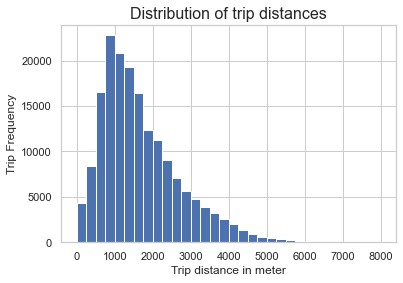

In [70]:
# Plotting the trip distances to 8000 meters - usually a trip takes 1,68 km
bin_edges = np.arange(0, 8000+1, 250)

# changing from kilometer to meter
df_weekdays['distance_in_meter'] = df_weekdays['distance'] * 1000

plt.hist(data = df_weekdays, x = "distance_in_meter", bins = bin_edges)
plt.xlabel("Trip distance in meter")
plt.ylabel("Trip Frequency")
plt.title("Distribution of trip distances", fontsize = 16);

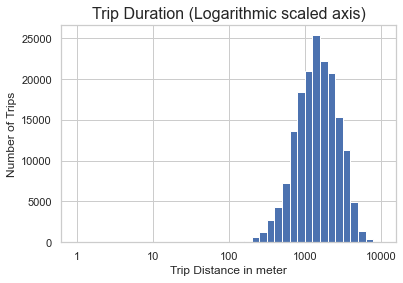

In [71]:
bin_edges = 10 ** np.arange(0, 4+0.1, 0.1) 

plt.hist((df_weekdays.distance_in_meter), bins = bin_edges)
plt.xscale('log')
tick_locs = [1,10,100, 1000, 10000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Trip Distance in meter')
plt.title('Trip Duration (Logarithmic scaled axis)', fontsize = 16)
plt.ylabel('Number of Trips');

Trips usually takes about 6-12 minutes and are 1-1.6 km long. Trip duration and the trip distance are log normal distributed.

### Univariate Exploration - Summary and Conclusion

- The Gender distribution shows us that lots of men using the bike renting platform. About 77 % of the users are male. 21 % are female
- Usually users are subscriber (93%)
- 65 % of the records are from San Francisco


- the most trips are taken from monday to friday with the highest peek on thurdays. Less traffic on weekends.
- high traffic is usually from the morning 6 am to the afternoon 5 pm
     - Lot's of people probably using the bikes to get to their workplace

- a trip usually takes about 6 to 12 minutes
- a trip is usually 1 km to 1,6 km long
    - user's using the bikes usually for short distances
    
    
### Unusual points and Transformation

There some unusual points in the trip duration/distances column. One record tells us that someone takes a ride about 70km - this user probably used mainly the train. There are also some unusual outliers in the trip duration (e.g. 45 days) 

For the further investigation I only want to check rides within an hour. Unfortunately the chicago dataframe doesn't provide any information about the distances of the rides. (using an api for the physical adresses could be helping)

I transformed the distance and trip duration to an logarithmic scaled axis. Both variables are log normal distributed.

<a id="biv" ></a>
## 5.5 Bivariate Exploration

first im watching for interesting distribution with boxplots and violinplots for gender, user type and city.

In [72]:
# making a copy for the biviriate exploration
df_biv = df_weekdays.copy()

In [73]:
# filtering all data within an hour (3600 seconds) and making an extra column with trip duration in minutes
df_biv = df_biv[df_biv["trip_duration_seconds"] <= 3600]
df_biv["trip_duration_minutes"] = df_biv.trip_duration_seconds / 60

In [74]:
# testing the filtering step
df_biv[df_biv.trip_duration_minutes > 3600]

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates,distance,weekday,hour,day_time,trip_duration,distance_in_meter,trip_duration_minutes


In [75]:
df_biv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266637 entries, 3 to 268464
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   trip_duration_seconds  266637 non-null  int64          
 1   start_time             266637 non-null  datetime64[ns] 
 2   end_time               266637 non-null  datetime64[ns] 
 3   start_station_id       266637 non-null  object         
 4   start_station_name     266637 non-null  object         
 5   end_station_id         266637 non-null  object         
 6   end_station_name       266637 non-null  object         
 7   user_type              266637 non-null  category       
 8   member_birth_year      266637 non-null  int64          
 9   member_gender          266637 non-null  category       
 10  city                   266637 non-null  category       
 11  start_coordinates      173566 non-null  object         
 12  end_coordinates        173566 

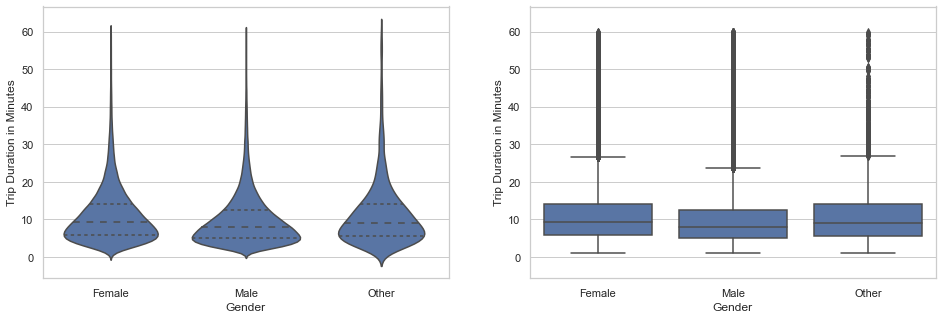

In [76]:
# Plotting the Trip duration seperated in Gender
plt.figure(figsize = [16, 5])

# plotting as violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_biv, y='trip_duration_minutes', x='member_gender', color=base_color, inner="quartile")
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender")

# plotting as a boxplot with the same y limited as the violinplot
plt.subplot(1,2,2)
sb.boxplot(data = df_biv, y='trip_duration_minutes', x='member_gender', color=base_color)
plt.ylim(ax1.get_ylim())
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender");

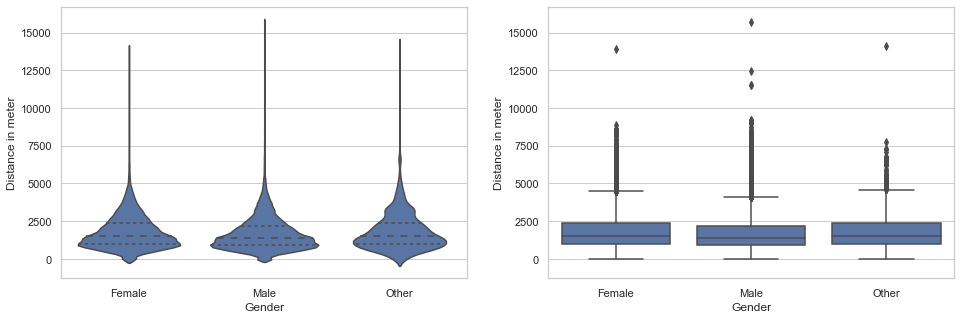

In [77]:
# Plotting the Trip distance seperated in Gender
plt.figure(figsize = [16, 5])

# plotting as violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_biv, y='distance_in_meter', x='member_gender', color=base_color, inner="quartile")
plt.ylabel("Distance in meter")
plt.xlabel("Gender")

# plotting as a boxplot with the same y limited as the violinplot
plt.subplot(1,2,2)
sb.boxplot(data = df_biv, y='distance_in_meter', x='member_gender', color=base_color)
plt.ylim(ax1.get_ylim())
plt.ylabel("Distance in meter")
plt.xlabel("Gender");

As aspected from the univariate plot, the most trips are taken round about 6-12 minutes. The trip duration of male users are slightly shorter than female/others. All gender take nearly a ride with the same trip distances.

For the next plot I'll want to observe the differences in trip duration between San Francisco and Chicago

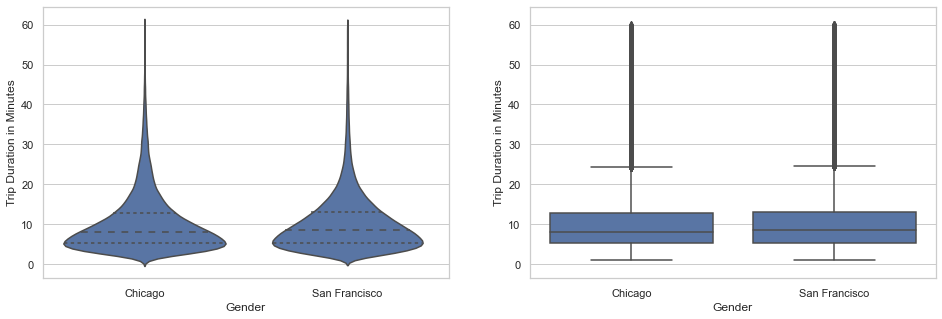

In [78]:
# Plotting the Trip duration seperated in Cities
plt.figure(figsize = [16, 5])

# plotting as violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_biv, y='trip_duration_minutes', x='city', color=base_color, inner="quartile")
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender")

# plotting as a boxplot with the same y limited as the violinplot
plt.subplot(1,2,2)
sb.boxplot(data = df_biv, y='trip_duration_minutes', x='city', color=base_color)
plt.ylim(ax1.get_ylim())
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender");

Users in San Francisco takes sligthly longer trips but overall there aren't big differences between this two cities.

I'm now interested the trip duration depending on the user type (customer and subscriber):

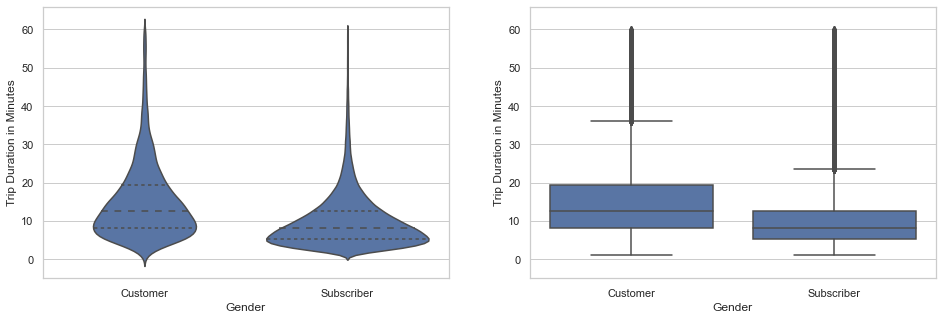

In [79]:
# Plotting the Trip duration seperated in User types
plt.figure(figsize = [16, 5])

# plotting as violinplot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_biv, y='trip_duration_minutes', x='user_type', color=base_color, inner="quartile")
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender")

# plotting as a boxplot with the same y limited as the violinplot
plt.subplot(1,2,2)
sb.boxplot(data = df_biv, y='trip_duration_minutes', x='user_type', color=base_color)
plt.ylim(ax1.get_ylim())
plt.ylabel("Trip Duration in Minutes")
plt.xlabel("Gender");

Customer takes longer trips than Subscriber. In Average Subscribers are taken trips under 10 minutes. Customer's trips takes about ~13 minutes.

For the next plot I want to confirm that Distance and trip duration show a strong positive relationship

In [80]:
# Only San Franciso has data about distances. Taking a 1000 sample for better resolution
df_SF_sample = df_biv[df_biv.city == "San Francisco"].sample(1000)

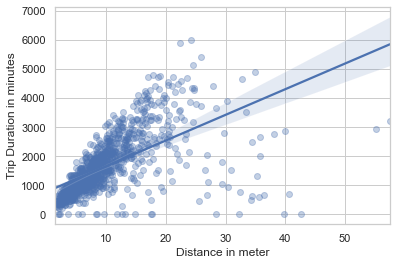

In [81]:
# Scatter plot of distance in meter to trip duration (should be a positve strong correlation)
sb.regplot(data = df_SF_sample, y = "distance_in_meter", x = "trip_duration_minutes",scatter_kws={'alpha':1/3})
plt.xlabel("Distance in meter")
plt.ylabel("Trip Duration in minutes");

### Bivariate Exploration - Boxplots and Violinplots

- Male users slightly driving for a shorter time period but driven nearly the same trip distances like female users.
- there is a strong correlation between trip duration and distance in meter (obviously), approximately positive linear relationship
- Subscribed users usually takes a shorter trip than customer users


Let's take a closer look to the distribution of gender/user type over weekdays and day time

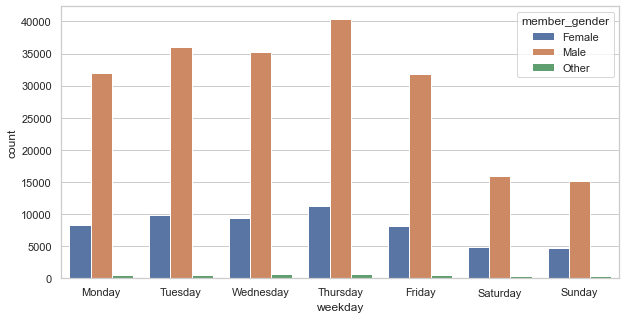

In [82]:
plt.figure(figsize=[10,5])
sb.countplot(data=df_biv, x = "weekday", hue="member_gender");

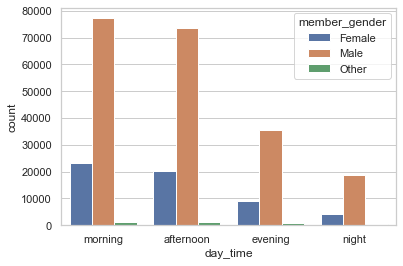

In [83]:
sb.countplot(data=df_biv, x = "day_time", hue="member_gender", order = day_time_order);

The Countplot isn't really helpful to get a better inisght in the behavior - in this case a relative comparison would be better

In [84]:
#df_biv.groupby(["member_gender", "weekday"])["start_time"].count().rename("proportion").groupby(level=0).apply(lambda x: x/x.sum())
df_biv["weekday"].groupby(df_biv["member_gender"]).value_counts(normalize=True).rename("proportion")

member_gender  weekday  
Female         Thursday     0.198116
               Tuesday      0.174529
               Wednesday    0.166255
               Monday       0.147343
               Friday       0.144909
               Saturday     0.085209
               Sunday       0.083639
Male           Thursday     0.195377
               Tuesday      0.174494
               Wednesday    0.170569
               Monday       0.154807
               Friday       0.154463
               Saturday     0.077154
               Sunday       0.073137
Other          Thursday     0.199552
               Wednesday    0.165687
               Friday       0.158690
               Tuesday      0.156171
               Monday       0.146655
               Sunday       0.088721
               Saturday     0.084523
Name: proportion, dtype: float64

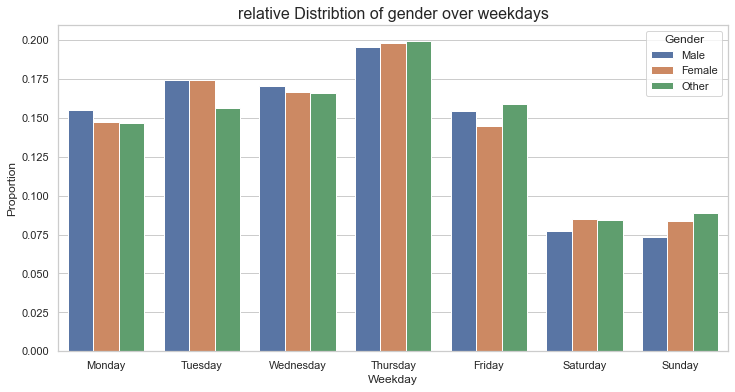

In [85]:
# Plotting the relative proportion of gender over weekdays
plt.figure(figsize=[12,6])

# declare all necessary variables of interest
x, y, hue = "weekday", "proportion", "member_gender"
hue_order = ["Male", "Female", "Other"]

proportion_df = df_biv[x].groupby(df_biv[hue]).value_counts(normalize=True).rename(y).reset_index()
#proportion_df.pipe((sb.barplot, "data"), x=x, y=y, hue=hue);

sb.barplot(data=proportion_df, x=x, y=y, hue=hue, hue_order=hue_order)
plt.legend(title="Gender")
plt.xlabel("Weekday")
plt.ylabel("Proportion")
plt.title("relative Distribtion of gender over weekdays", fontsize=16);

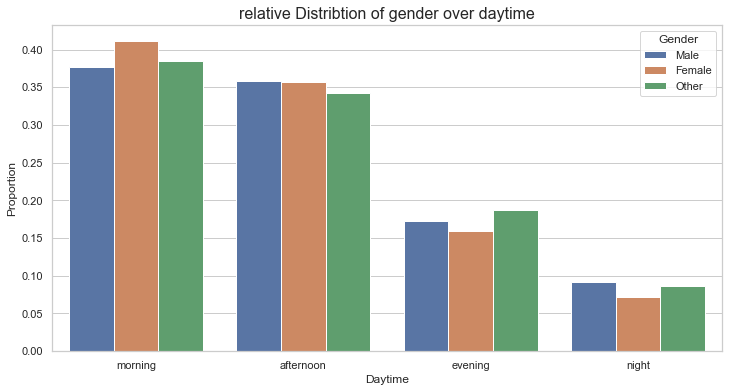

In [86]:
# Plotting the relative proportion of gender over daytime as a barplot
plt.figure(figsize=[12,6])

# declare all necessary variables of interest
x, y, hue = "day_time", "proportion", "member_gender"
hue_order = ["Male", "Female", "Other"]

proportion_df = df_biv[x].groupby(df_biv[hue]).value_counts(normalize=True).rename(y).reset_index()
#proportion_df.pipe((sb.barplot, "data"), x=x, y=y, hue=hue);

sb.barplot(data=proportion_df, x=x, y=y, hue=hue, hue_order=hue_order)
plt.legend(title="Gender")
plt.xlabel("Daytime")
plt.ylabel("Proportion")
plt.title("relative Distribtion of gender over daytime", fontsize=16);

The gender distribution plots don't show any big differences between the genders. On weekends there are ligthly more females/others taking a bike ride than male. 

Now take a closer look to the relative distribution of User types over the weekdays/daytime

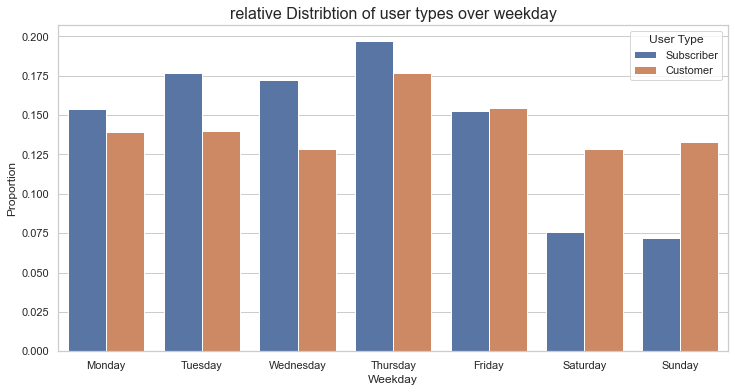

In [87]:
# # Plotting the relative proportion of user types over weekday as a barplot
plt.figure(figsize=[12,6])

# declare all necessary variables of interest
x, y, hue = "weekday", "proportion", "user_type"
hue_order = ["Subscriber", "Customer"]

proportion_df = df_biv[x].groupby(df_biv[hue]).value_counts(normalize=True).rename(y).reset_index()
#proportion_df.pipe((sb.barplot, "data"), x=x, y=y, hue=hue);

sb.barplot(data=proportion_df, x=x, y=y, hue=hue, hue_order=hue_order)
plt.legend(title="User Type")
plt.xlabel("Weekday")
plt.ylabel("Proportion")
plt.title("relative Distribtion of user types over weekday", fontsize=16);

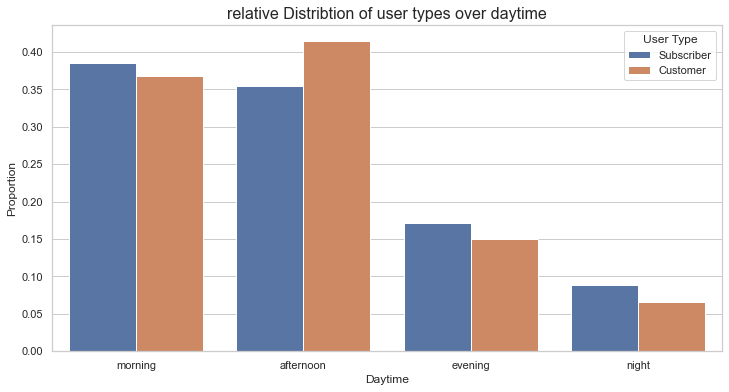

In [88]:
# # Plotting the relative proportion of user types over daytime as a barplot
plt.figure(figsize=[12,6])

# declare all necessary variables of interest
x, y, hue = "day_time", "proportion", "user_type"
hue_order = ["Subscriber", "Customer"]

proportion_df = df_biv[x].groupby(df_biv[hue]).value_counts(normalize=True).rename(y).reset_index()
#proportion_df.pipe((sb.barplot, "data"), x=x, y=y, hue=hue);

sb.barplot(data=proportion_df, x=x, y=y, hue=hue, hue_order=hue_order)
plt.legend(title="User Type")
plt.xlabel("Daytime")
plt.ylabel("Proportion")
plt.title("relative Distribtion of user types over daytime", fontsize=16);

the user types show a clearly difference. On weekdays more subscriber take a ride with bike but on weekends there a lot more customers than subsriber. the daytime plot isn't so interesting.

### Bivariate Exploration - Grouped Barplots - Summary

- the comparison of absolute values isn't really helpful in this case. A comparison with the relative distribution of each group(gender, usertype) gives more insights. (e.g. what's the proportion of females on sundays)

- the gender plots for weekdays and daytime don't show any really interesting points. Maybe females preferly drives in the morning but at the evening/night sliglty less females than males take a ride with the bike. Probably it's because of security issues/criminality?

- the user types show a clearly difference. On weekdays more subscriber take a ride with bike but on weekends there a lot more customers than subsriber.(don't forget: there lot more subscriber than customer in the dataframes)




<a id="multi" ></a>
## Multivariate Exploration

Now I want to look what's the average Trip Duration per weekday/day time for each gender.

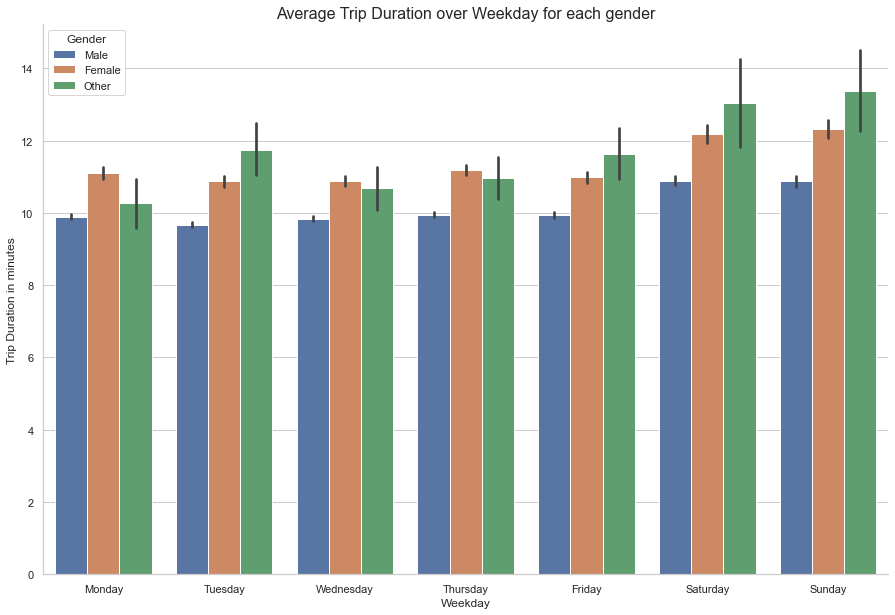

In [89]:
# ordering the hue value
hue_order = ["Male", "Female", "Other"]

# creating bar plot with the average trip duration of each weekday for each gender
sb.catplot(data = df_biv, x="weekday", y="trip_duration_minutes", hue="member_gender", hue_order=hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("Weekday")
plt.ylabel("Trip Duration in minutes")
plt.legend(title = "Gender")
plt.title("Average Trip Duration over Weekday for each gender", fontsize=16);

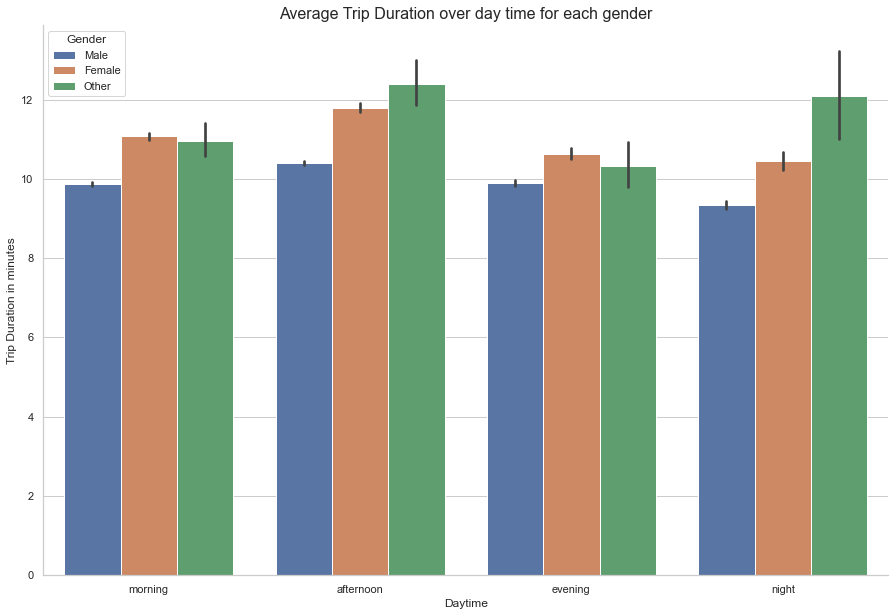

In [90]:
# ordering the hue value: gender
hue_order = ["Male", "Female", "Other"]

# creating bar plot with the average trip duration of each daytime for each gender
sb.catplot(data = df_biv, x="day_time", y="trip_duration_minutes", hue="member_gender", hue_order=hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("Daytime")
plt.ylabel("Trip Duration in minutes")
plt.legend(title = "Gender")
plt.title("Average Trip Duration over day time for each gender", fontsize=16);

The Average Trip duration for female and others are usually longer than male users. The trip duration on the weekend for all genders is usually longer than workdays. The same oberservation is shown in the day time: Male users take in average shorter trips

For the next one we will take the same plot type for user types:

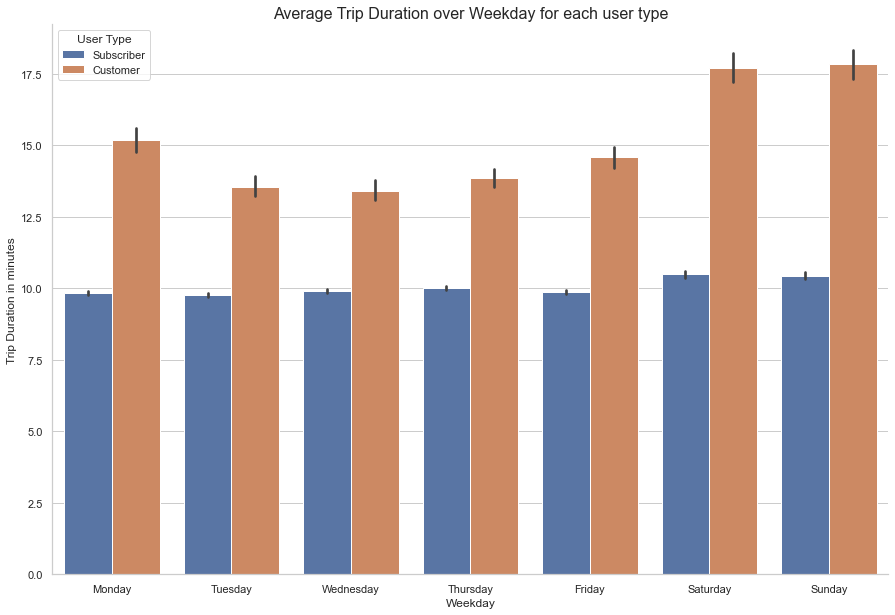

In [91]:
# # ordering the hue value: user type
hue_order = ["Subscriber", "Customer"]

# creating bar plot with the average trip duration of each daytime for each user type
sb.catplot(data = df_biv, x="weekday", y="trip_duration_minutes", hue="user_type", hue_order = hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("Weekday")
plt.ylabel("Trip Duration in minutes")
plt.legend(title = "User Type")
plt.title("Average Trip Duration over Weekday for each user type", fontsize=16);

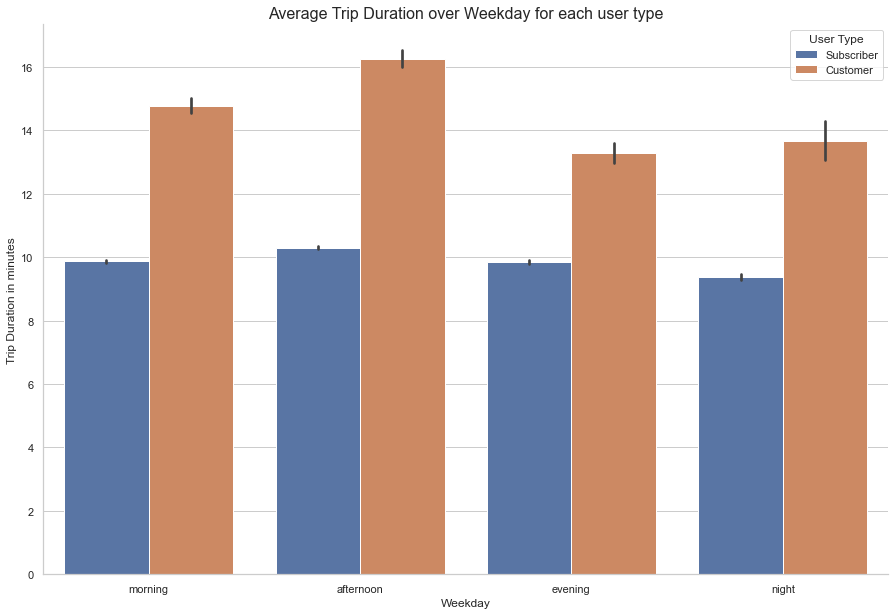

In [92]:
# creating bar plot with the average trip duration of each daytime for each user type
sb.catplot(data = df_biv, x="day_time", y="trip_duration_minutes", hue="user_type", hue_order = hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("Weekday")
plt.ylabel("Trip Duration in minutes")
plt.legend(title = "User Type")
plt.title("Average Trip Duration over Weekday for each user type", fontsize=16);

The average trip duration for customers is much higher than subscribers. Subscribers take in average a ride about 10 mins on all days. Customers take a ride 13-15 mins on workdays and at the weekend over 17,5 mins. Over one day customers take in average longer trip too. (e.g. at the afternoon about 16 minutes per trip)

For the last exploration I only want to compare the correlation of distance to Trip duration separated in female and male. Based on the shown results male should be a bit faster than female users.

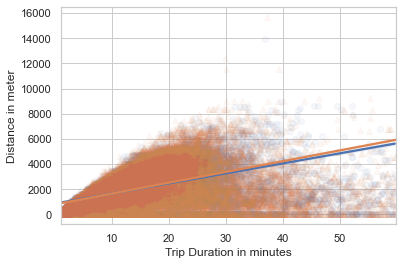

In [93]:
# creating a scatterplot with a linear regression line of Trip Distance over duration time for female and male
df_SF_sample = df_biv[df_biv.city == "San Francisco"]

ttypes_markers = [["Female", "o"],
         ["Male", "^"]]

for ttype, marker in ttypes_markers:
    plot_data = df_SF_sample.loc[df_SF_sample.member_gender == ttype]
    sb.regplot(data=plot_data, y = "distance_in_meter", x = "trip_duration_minutes", fit_reg=True, marker = marker,
              scatter_kws={'alpha':1/20});
    
plt.ylabel("Distance in meter")
plt.xlabel("Trip Duration in minutes");

There are many values with a distance of 0 meter. Take a look on all values with 0 meters

In [94]:
df_biv[df_biv.distance == 0]

,trip_duration_seconds,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,city,start_coordinates,end_coordinates,distance,weekday,hour,day_time,trip_duration,distance_in_meter,trip_duration_minutes
17,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180,Telegraph Ave at 23rd St,180,Telegraph Ave at 23rd St,Customer,1978,Male,San Francisco,"(37.8126783, -122.2687726)","(37.8126783, -122.2687726)",0.0,Thursday,23,night,0 days 00:14:34,0.0,14.566667
25,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78,Folsom St at 9th St,78,Folsom St at 9th St,Subscriber,1982,Male,San Francisco,"(37.7737172, -122.4116467)","(37.7737172, -122.4116467)",0.0,Thursday,23,night,0 days 00:06:48,0.0,6.800000
31,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133,Valencia St at 22nd St,133,Valencia St at 22nd St,Subscriber,1992,Male,San Francisco,"(37.7552126, -122.4209752)","(37.7552126, -122.4209752)",0.0,Thursday,23,night,0 days 00:07:51,0.0,7.850000
51,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,11,Davis St at Jackson St,Subscriber,1995,Male,San Francisco,"(37.79728, -122.398436)","(37.79728, -122.398436)",0.0,Thursday,22,night,0 days 00:57:58,0.0,57.966667
52,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11,Davis St at Jackson St,11,Davis St at Jackson St,Subscriber,1983,Female,San Francisco,"(37.79728, -122.398436)","(37.79728, -122.398436)",0.0,Thursday,22,night,0 days 00:52:20,0.0,52.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174854,758,2019-02-01 03:53:58.351,2019-02-01 04:06:36.653,385,Woolsey St at Sacramento St,385,Woolsey St at Sacramento St,Subscriber,1987,Male,San Francisco,"(37.8505777, -122.2781754)","(37.8505777, -122.2781754)",0.0,Friday,3,night,0 days 00:12:38,0.0,12.633333
174863,1476,2019-02-01 02:45:04.744,2019-02-01 03:09:41.184,345,Hubbell St at 16th St,345,Hubbell St at 16th St,Subscriber,1967,Male,San Francisco,"(37.766482696439496, -122.39827930927277)","(37.766482696439496, -122.39827930927277)",0.0,Friday,2,night,0 days 00:24:36,0.0,24.600000
174864,877,2019-02-01 02:53:15.995,2019-02-01 03:07:53.058,385,Woolsey St at Sacramento St,385,Woolsey St at Sacramento St,Subscriber,1987,Male,San Francisco,"(37.8505777, -122.2781754)","(37.8505777, -122.2781754)",0.0,Friday,2,night,0 days 00:14:37,0.0,14.616667
174895,874,2019-02-01 01:41:43.414,2019-02-01 01:56:17.552,253,Haste St at College Ave,253,Haste St at College Ave,Subscriber,1995,Male,San Francisco,"(37.86641794050319, -122.25379943847656)","(37.86641794050319, -122.25379943847656)",0.0,Friday,1,night,0 days 00:14:34,0.0,14.566667


Some people probably rent a bike at one station and returned after traveling back to the same station

In [95]:
# filtering all values with a trip distance more than 0 meters
df_SF_sample = df_SF_sample[df_SF_sample.distance != 0]

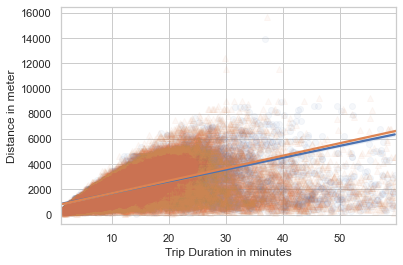

In [96]:
# creating a scatterplot with a linear regression line of Trip Distance over duration time for female and male
ttypes_markers = [["Female", "o"],
         ["Male", "^"]]

for ttype, marker in ttypes_markers:
    plot_data = df_SF_sample.loc[df_SF_sample.member_gender == ttype]
    sb.regplot(data=plot_data, y = "distance_in_meter", x = "trip_duration_minutes", fit_reg=True, marker = marker,
              scatter_kws={'alpha':1/20})
    
plt.ylabel("Distance in meter")
plt.xlabel("Trip Duration in minutes");

### Multivariate Exploration - Summary

- The Average Trip duration for female and others are usually longer than male users. The trip duration on the weekend is usually longer than workdays

- The average trip duration for customers is much higher than subscribers. Subscribers takes in average a ride about 10 mins on all days. Customers takes a ride 13-15 mins on workdays and at the weekend over 17,5 mins.

- There a lot "loop" travels where people returned the bike to the same location. As shown in the bivariate exploration, there is a strong positve correlation between Duration and Distance (obviously). Male users are slightly faster than women

In [97]:
df_biv.to_csv("renting_bike_SF_CHI.csv", index=False)